# Visualizing linear transformations and eigenvalues
## Linear algebra 1 for science nerds
---

## Getting Python ready

Loading some standard Python packages for linear algebra and plotting:

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import ipywidgets as widgets

And here is a built in function for plotting one or more vectors in 2D:

In [2]:
def plot_vector(v, origin = np.array([0,0]), head_width = 0.1, head_length = 0.1, color = 'k', linestyle = "-"):
    # Plots a single vector starting at the origin (or another point)

    plt.arrow(origin[0], origin[1], v[0], v[1], head_width = head_width, head_length = head_length, ec = color, fc = color, linestyle = linestyle)

def plot_columns(A, head_width = 0.1, head_length = 0.1, color = 'k', linestyle = "-"):
    # Plots the columns of an 2 x n matrix as vectors starting from the origin.


    ###CURRENTLY broken since I don't quite understand the syntax for 'quiver'
#    origins = np.zeros(a.shape[0]) #zeroes as tails of all vectors.
#    plt.quiver(
#        origins, origins, #zero as vector origin
#        a[0,:], a[1,:], #vector tips x and y coordinates as columns of a
#        #head_width = headwidth,
#       #head_length = headlength,
#        angles = 'xy'
#    )

    for column in range(A.shape[1]):
        plot_vector(A[:,column], head_width = head_width, head_length = head_length, color = color, linestyle = linestyle)

---

## Plotting vectors

We can plot vectors as arrows starting from the origin, e.g. for three vectors
$$
    x = \begin{bmatrix}
        1 \\ 2
    \end{bmatrix},\quad 
    y = \begin{bmatrix}
        -1 \\ 1
    \end{bmatrix},\quad
    z = \begin{bmatrix}
        -1 \\ -0.5
    \end{bmatrix}.
$$

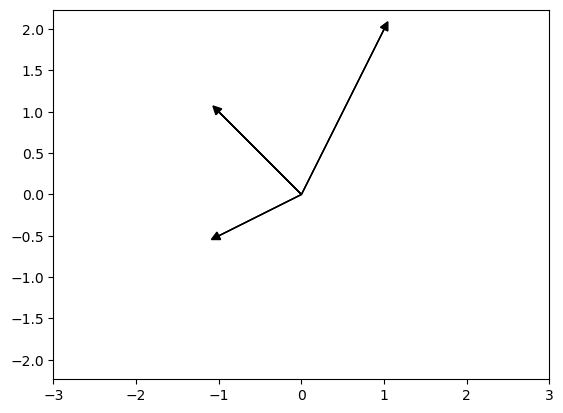

In [3]:
#Make up three vectors
x = np.array([1, 2])
y = np.array([-1,1])
z = np.array([-1,-0.5])

#Plot the vectors
plot_vector(x)
plot_vector(y)
plot_vector(z)

#Plot options
plt.axis('equal')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

Instead of manually plotting each vector, we can plot the vectors all at once by first putting them in the columns of a matrix, which here in this order would give the $2 \times 3$ matrix
$$
    A =
    \begin{bmatrix}
        1 & -1 & -1 \\
        2 & 1 & -0.5
    \end{bmatrix}
$$

In [4]:
#Combine the vectors into the columns of a matrix:
A = np.vstack([x, y, z]).transpose()

print(A)
print('Shape of A:')
print(A.shape)

[[ 1.  -1.  -1. ]
 [ 2.   1.  -0.5]]
Shape of A:
(2, 3)


(-3.0, 3.0)

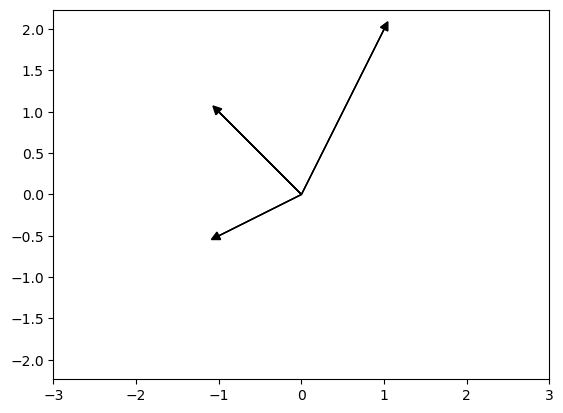

In [5]:
#Plotting the columns of a matrix as vectors:

plot_columns(A)

plt.axis('equal')
plt.xlim([-3,3])
plt.ylim([-3,3])

We can also draw vectors starting at points other than the origin:

(0.0, 3.0)

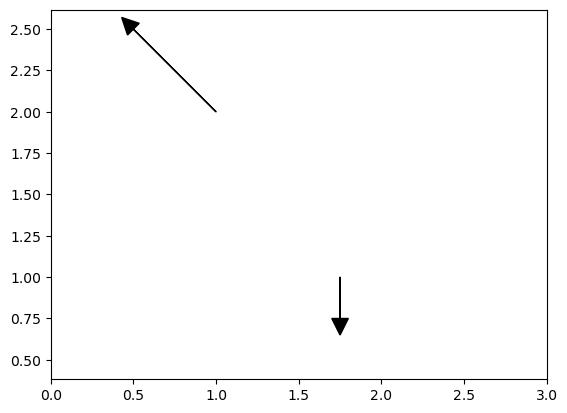

In [6]:
v_origin = np.array([1,2])
v = np.array([-0.5,0.5])

w_origin = np.array([1.75,1])
w = np.array([0,-0.25]) 

plot_vector(v, origin = v_origin)
plot_vector(w, origin = w_origin)

plt.axis('equal')
plt.xlim([0,3])
plt.ylim([0,3])

# Vector addition:

So, we can draw vector addition, for example:

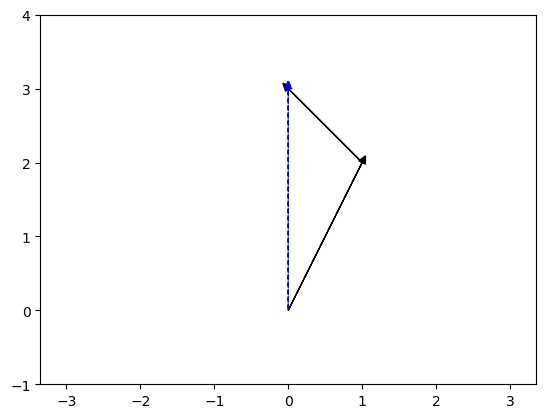

In [7]:
#Using the same x and y as before

plot_vector(x)
plot_vector(y, origin = x)
plot_vector(x + y, color = 'b', linestyle = '--')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-1,4])
plt.show()

Or doing tip-to-tail in the other order:

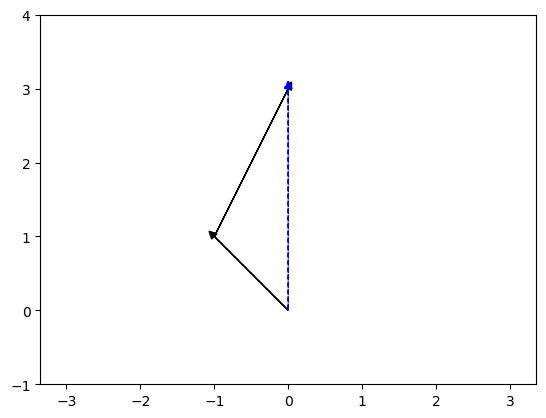

In [8]:
plot_vector(y)
plot_vector(x, origin = y)
plot_vector(x + y, color = 'b', linestyle = '--')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-1,4])
plt.show()

...which shows commutativity of vector addition:

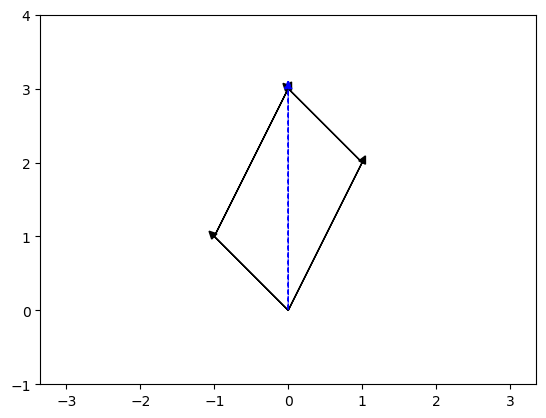

In [9]:
plot_vector(x)
plot_vector(y, origin = x)

plot_vector(y)
plot_vector(x, origin = y)

plot_vector(x + y, color = 'b', linestyle = '--')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-1,4])
plt.show()

## Visualizing linear transformations

A matrix $A$ represents the linear transformation that maps each standard basis vector to the corresponding column of $A$. The standard basis for $\mathbb{R}^n$, when put as the columns of a matrix, forms the identity matrix:

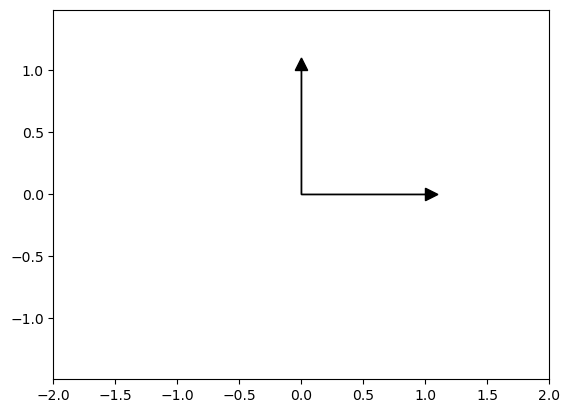

In [10]:
plot_columns(np.eye(2))

plt.axis('equal')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

For example, for the matrix
$$
    A = \begin{bmatrix}
        1 & -1 \\
        1 & 1
    \end{bmatrix},
$$
the standard basis vectors get mapped as so:

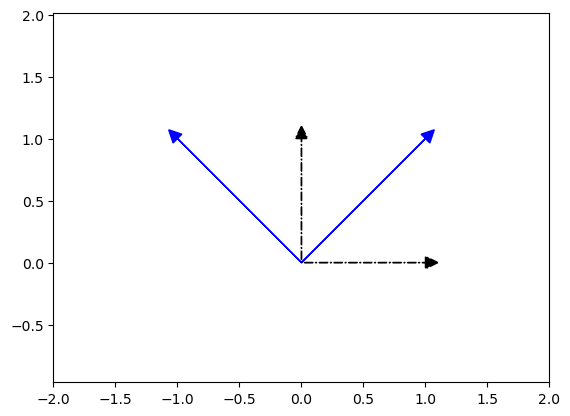

In [11]:
A = np.array(
    [[1, -1],
     [1, 1]])

# plot the columns of A
plot_columns(A, color = 'b')

# include the standard basis
plot_columns(np.eye(2), linestyle = '-.')

plt.axis('equal')
plt.xlim([-2,2])
plt.xlim([-2,2])
plt.show()

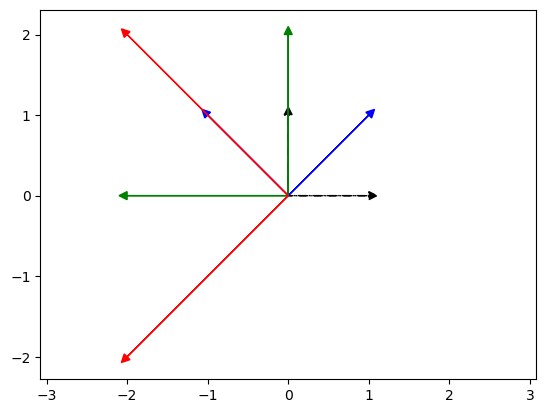

In [12]:
#What happens to A^2? And A^3?

#Plot standard basis
plot_columns(np.eye(2), linestyle = '-.')

#Plot A again
plot_columns(A, color = 'b')

#Plot A^2
plot_columns(A @ A, color = 'g')

#Plot A^3
plot_columns(A @ A @ A, color = 'r')
plt.axis('equal')
plt.xlim([-2,2])
plt.xlim([-2,2])
plt.show()

## Rotation matrices

A rotation matrix by angle $\theta$ rotates every vector by the angle $\theta$, conventionally taken counterclockwise. So, the vector $e_1=(1,0)$ goes to $(\cos(\theta), \sin(\theta)$, and $e_2=(0,1)$ gets mapped to $(-\sin(\theta), \cos\theta)$. Therefore the matrix is
$$
    R_\theta =
        \begin{bmatrix}
            \cos(\theta) & -\sin(\theta) \\
            \sin(\theta) & \cos(\theta)
        \end{bmatrix}.
$$

### Exercise:
Write a python function that takes in a real angle $\theta$ and outputs the matrix $R_\theta$.

In [13]:
### Your solution here!

#

#

In [14]:
### My solution:

def rotation_matrix(theta):
    # Returns 2 x 2 rotation by angle theta

    #Avoid computing cos and sin twice:
    c = np.cos(theta); s = np.sin(theta)
    
    return np.array(
        [[c, -s],
        [s, c]])

Let's visualize a rotation by a small angle:

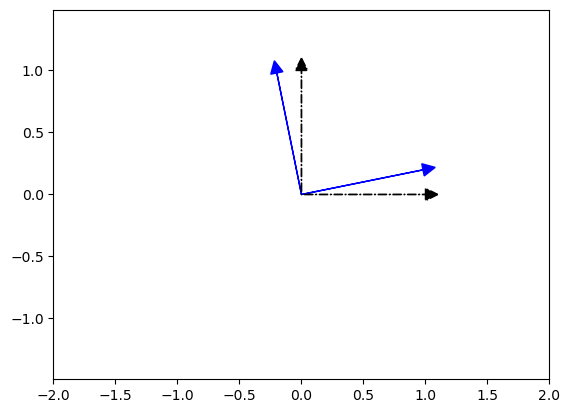

In [15]:
plot_columns(rotation_matrix(0.2), color = 'b')

#include standard basis too

plot_columns(np.eye(2), linestyle = '-.')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

Note that a rotation (counterclockwise) by a *negative* angle is the same as rotating clockwise by a positive angle:

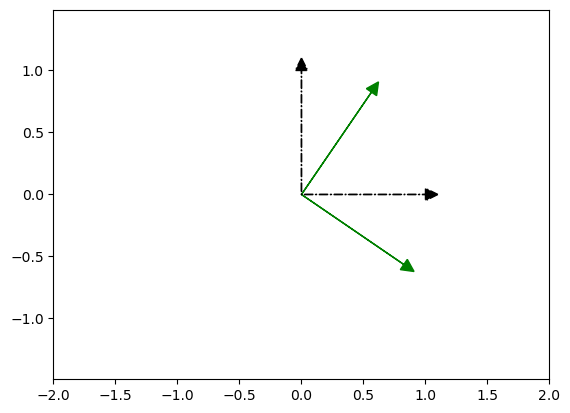

In [16]:
plot_columns(rotation_matrix(-0.6), color = 'g')

#include standard basis too

plot_columns(np.eye(2), linestyle = '-.')

plt.axis('equal')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

In [30]:
def rotation_slider(theta):
    plot_columns(rotation_matrix(theta), color = 'b')
    #include standard basis too
    plot_columns(np.eye(2), linestyle = '-.')
    plt.axis('equal')
    plt.xlim([-2,2])
    plt.ylim([-2,2])

#plot_columns(np.eye(2), linestyle = '-.')
widgets.interact(
#    lambda theta: plot_columns(rotation_matrix(theta), color = 'b'),
    rotation_slider,
    theta = widgets.FloatSlider(value = 0, min = -2*np.pi, max = 2*np.pi,step = 0.005)
);

interactive(children=(FloatSlider(value=0.0, description='theta', max=6.283185307179586, min=-6.28318530717958…